In [11]:
import cv2
import numpy as np


In [12]:
# Paths to YOLO files
yolo_weights = "yolov3.weights"
yolo_config = "yolov3.cfg"
coco_names = "coco.names"

In [13]:
# Load class labels from COCO dataset
with open(coco_names, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load YOLO model
net = cv2.dnn.readNet(yolo_weights, yolo_config)

# Get output layer names
layer_names = net.getLayerNames()
try:
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]


In [14]:

# Load an image to test
image_path = "sample.png"  # Replace with your image path
image = cv2.imread(image_path)
height, width, _ = image.shape

# Prepare image for YOLO model
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)


In [15]:

# Run forward pass and get detections
detections = net.forward(output_layers)

# Initialize lists for bounding boxes, confidences, and class IDs
boxes, confidences, class_ids = [], [], []

# Process detections
for detection in detections:
    for obj in detection:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Filter weak detections
        if confidence > 0.5:
            center_x, center_y = int(obj[0] * width), int(obj[1] * height)
            w, h = int(obj[2] * width), int(obj[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [16]:
# Apply Non-Maxima Suppression (NMS) to remove duplicate boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [17]:

# Draw bounding boxes and labels
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    color = (0, 255, 0)  # Green bounding box color

    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


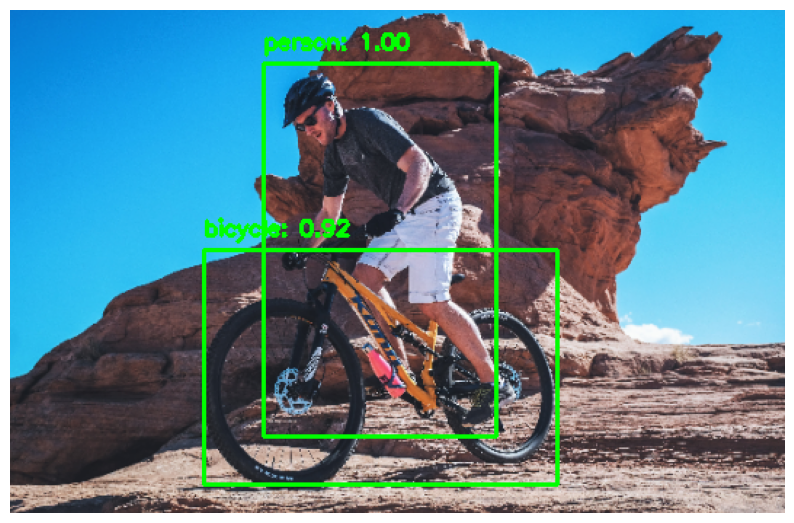

In [20]:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()